In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

In [5]:
df = pd.read_csv('income.csv')

In [6]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


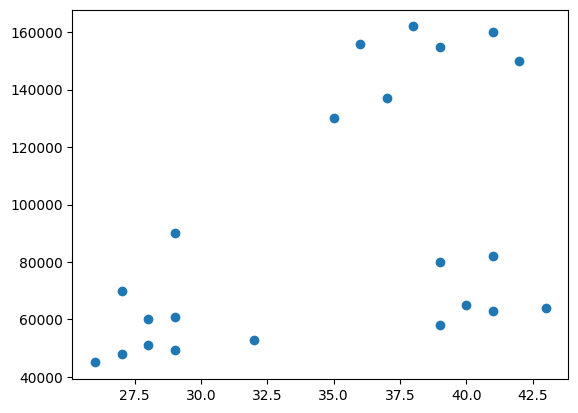

In [7]:
plt.scatter(df.Age,df['Income($)'])

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [24]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])

In [25]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [26]:
df['cluster'] = y_pred

In [27]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [28]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

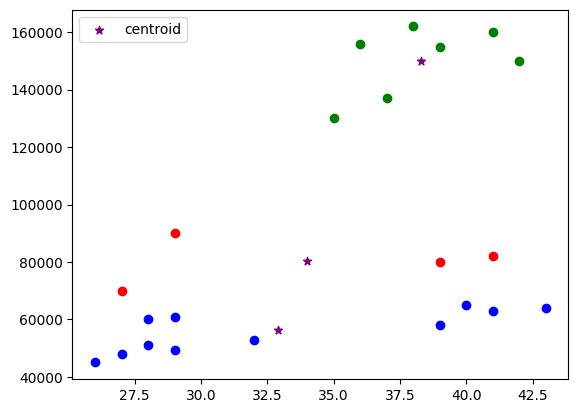

In [30]:
plt.scatter(df0.Age,df0['Income($)'],color = 'red')
plt.scatter(df1.Age,df1['Income($)'],color = 'green')
plt.scatter(df2.Age,df2['Income($)'],color = 'blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

In [34]:
# now using Minmaxscaler
scale = MinMaxScaler()

df[['Age','Income($)']]=scale.fit_transform(df[['Age','Income($)']])


In [40]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [44]:
km_scale = KMeans(n_clusters=3)
y_sc_predict = km_scale.fit_predict(df[['Age','Income($)']])
km_scale.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [46]:
y_sc_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [47]:
df['cluster']=y_sc_predict

In [48]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


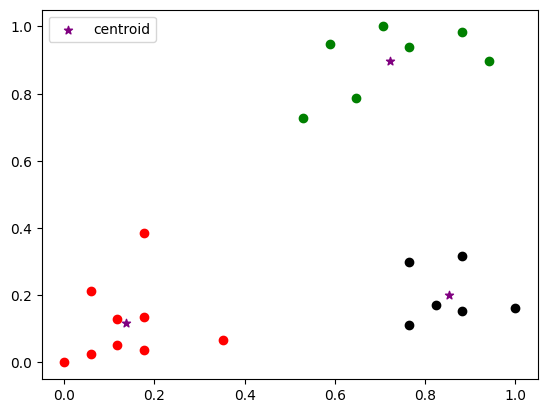

In [55]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km_scale.cluster_centers_[:,0],km_scale.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [61]:
sse=[]
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [62]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.2244333448724142,
 0.1685851223602976,
 0.13265419827245162,
 0.10740235405674736]

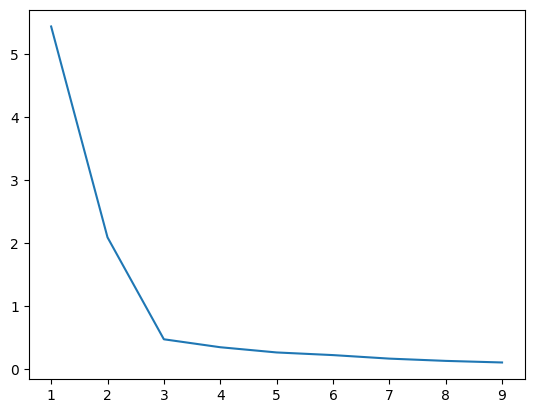

In [63]:
plt.plot(k_range,sse)

In [64]:
# so best k is 3

# EXERCISE

In [70]:
from sklearn.datasets import load_iris

In [71]:
iris = load_iris()

In [72]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [73]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
df['cluster'] = iris.target

In [75]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace = True)

In [77]:
X = df[['petal length (cm)','petal width (cm)']] 

In [91]:
kmodel = KMeans(n_clusters=3)
y_predict = kmodel.fit_predict(X)

In [92]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
kmodel.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [83]:
df['y_predict'] = y_predict

In [84]:
df.head()

,petal length (cm),petal width (cm),cluster,y_predict
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [85]:
df.drop('cluster',axis=1,inplace=True)

In [93]:
df0= df[df.y_predict==0]
df1= df[df.y_predict==1]
df2= df[df.y_predict==2]
df2.head()

,petal length (cm),petal width (cm),y_predict
50,4.7,1.4,2
51,4.5,1.5,2
52,4.9,1.5,2
53,4.0,1.3,2
54,4.6,1.5,2


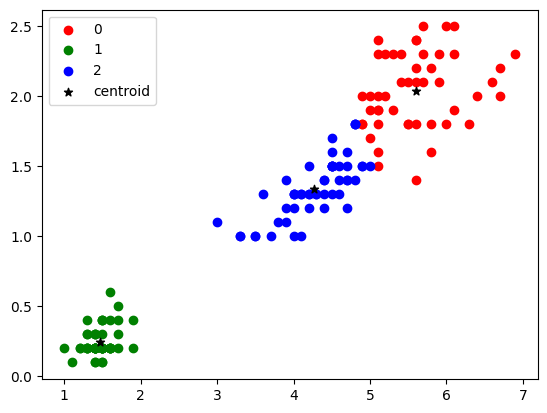

In [101]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'red',label='0')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green',label='1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'blue',label='2')
plt.scatter(kmodel.cluster_centers_[:,0],kmodel.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()

In [102]:
sse=[]
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(X)
    sse.append(km.inertia_)

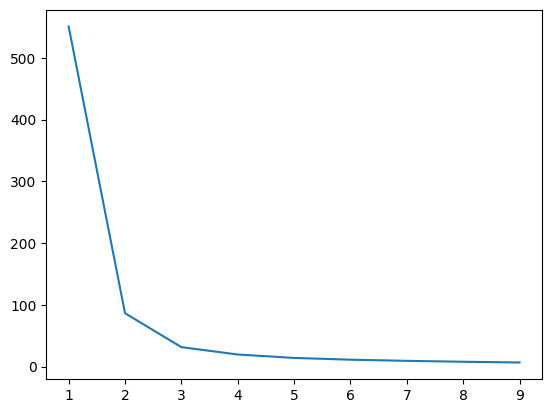

In [104]:
plt.plot(k_range,sse)